## NLP Text Clustering 

#### Clustering is an unsupervised learning. It works by grouping similar things together. KMeans is the most popular clustering algorithm and needs us to specify number of clusters and can predict cluseters for unseen datasets. There are no lables in unsupervised learning. If there were labels then this would have been a classification problem.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### The dataset need for this notebook can be downloaded from http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip. 

In [2]:
# load_files loads text files with classes as subfolder names
from sklearn.datasets import load_files 

# for reproducibility
random_state = 100 

DATA_DIR = "./bbc-fulltext/bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
print('data\n',data['data'][1])
print('\ntarget\n',data['target'][1])


data
 EU software patent law delayed

Controversial new EU rules for the patenting of computer-based inventions have been put on hold due to a last minute intervention from Poland.

Poland - a large and therefore crucial EU member - has requested more time to consider the issue, especially as it relates to the patenting of software. Critics say the law would favour large companies over small, innovative ones. They say it could have massive ramifications for developments such as open source software.

Polish ministers want to see the phrasing of the text of the Directive on the Patentability of Computer-Implemented Inventions changed so that it excludes the patenting of software. The planned law has ignited angry debate about whether the EU should allow the patenting of computer programs and internet business methods as currently happens in the US. So, for instance, US-based Amazon.com holds a patent on 'one-click shopping'. Critics claim the law, which the EU says is needed to harmonis

In [3]:
data_df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
data_df.head()

,text,label
0,US woman sues over ink cartridges\n\nA US woma...,4
1,EU software patent law delayed\n\nControversia...,4
2,Robben plays down European return\n\nInjured C...,3
3,US regulator to rule on pain drug\n\nUS food a...,0
4,Edwards tips Idowu for Euro gold\n\nWorld outd...,3


##### The dataset has 2225 documents and 5 classes; business, entertainment, politics, sport, and tech.

In [4]:
print('unique classes are:', data_df['label'].unique())
print('number of documents:', len(data_df))

unique classes are: [4 3 0 2 1]
number of documents: 2225


#### Now we compute TF-IDF values. The resulting feature matrix will be used for training.

In [5]:
tfidf_vec = TfidfVectorizer(stop_words="english")
tfidf_vec.fit(data_df.text.values)
features = tfidf_vec.transform(data_df.text.values)

#### creating a k-means clustering model

In [6]:
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=100, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [7]:
# predict cluster labels for new dataset
cls.predict(features)

array([2, 2, 0, ..., 2, 2, 0])

In [8]:
features

<2225x29126 sparse matrix of type '<class 'numpy.float64'>'
	with 322146 stored elements in Compressed Sparse Row format>

#### The TfIdf result is a very high dimension data and will be hard to plot it. Principle Component Aanalysis transforms high 
#### dimensional data to lower dimension. Here we reduce it to 2 dimensions.

In [9]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

#### Visualizing the clusters

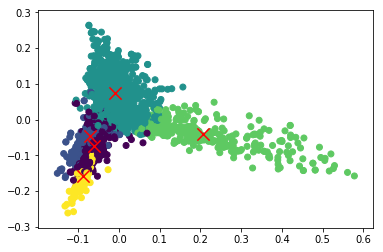

In [10]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')

### Evaluation

In [11]:
from sklearn.metrics import homogeneity_score
homogeneity_score(data_df.label, cls.predict(features))

0.5156703649915512

#### The scores are not good because the clusters are overlapping. We have to repeatedly try with different parameters for feature extraction